In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [7]:
df=pd.read_csv("creditcard.csv")

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


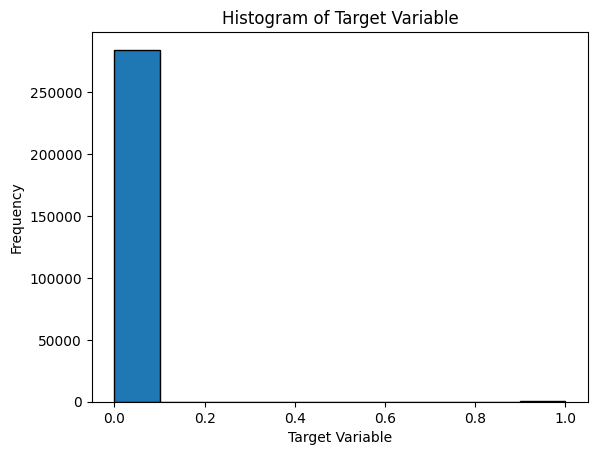

In [9]:
target_variable = df['Class']
plt.hist(target_variable, bins=10, edgecolor='black')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable')
plt.show() #

In [10]:
y_train=df[["Class"]].copy()
df = df.drop('Class', axis=1)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(df, y_train)

In [12]:
cases_count = y_train_resampled['Class'].value_counts()
print(cases_count)

Class
0    284315
1    284315
Name: count, dtype: int64


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.30, random_state=30)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

# Create the GridSearchCV instance

# Fit the grid search to the training data
rf.fit(X_train, y_train)

# Print the best parameters found by grid search

# Get the best estimator from the grid search

# Make predictions on the test data using the best model
predictions = rf.predict(X_test)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

C:\Users\moham\AppData\Local\Temp\ipykernel_10888\2125998287.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Accuracy: 0.9998886211889395


In [15]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create an XGBoost classifier instance
xgb_classifier = xgb.XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create the GridSearchCV instance
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid, cv=3)

# Fit the grid search to the training data
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best Parameters:", grid_search_xgb.best_params_)

# Get the best estimator from the grid search
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions on the test data using the best model
xgb_predictions = best_xgb_model.predict(X_test)

# Evaluate the accuracy of the best model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
XGBoost Accuracy: 0.9998651730181899


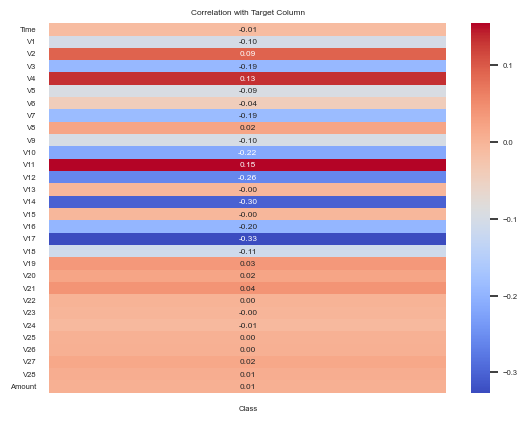

In [19]:
df1=pd.read_csv("creditcard.csv")
corr = df1.corr()

# extract the correlations with the target column
target_corr = corr['Class'].drop('Class')

# create a heatmap of the correlations with the target column
sns.set(font_scale=0.5)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Target Column')
plt.show()

In [20]:
#since are features are unknown , looking at the confusion matrix is essential before training